<a href="https://colab.research.google.com/github/BrendaCopatti/fuel-consumption-co2/blob/main/fuel_consumption_co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto integrador módulo 5**
## Brenda Sabrina Copatti, Gustavo Migliorini, Luiz Fernando

### Import gerais

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from math import sqrt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Import auth Google Drive

In [123]:
import google
from google.colab import auth
!pip install -U -q PyDrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials

### Autenticação Google Drive

In [124]:
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Leitura do arquivo .csv para o DataFrame

In [125]:
file_fuel_co2 = drive.CreateFile({'id': '1-o71Xzmm6i3bAVF3JTCOV_VvOiwBYel6'})
file_fuel_co2.GetContentFile('fuel_co2_2022.csv')

fuel_co2 = pd.read_csv('fuel_co2_2022.csv')

### Visualização e análise dos dados

#### Cabeçalho

In [126]:
fuel_co2.head()

,year,model_name,model_type,vehicle_class,engine_size_L,cylinders,transmission,fuel_type,consumption_city,consumption_hwy,comb_L_100,comb_mpg,co2_emissions,co2_rating,smog
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


#### Heatmap

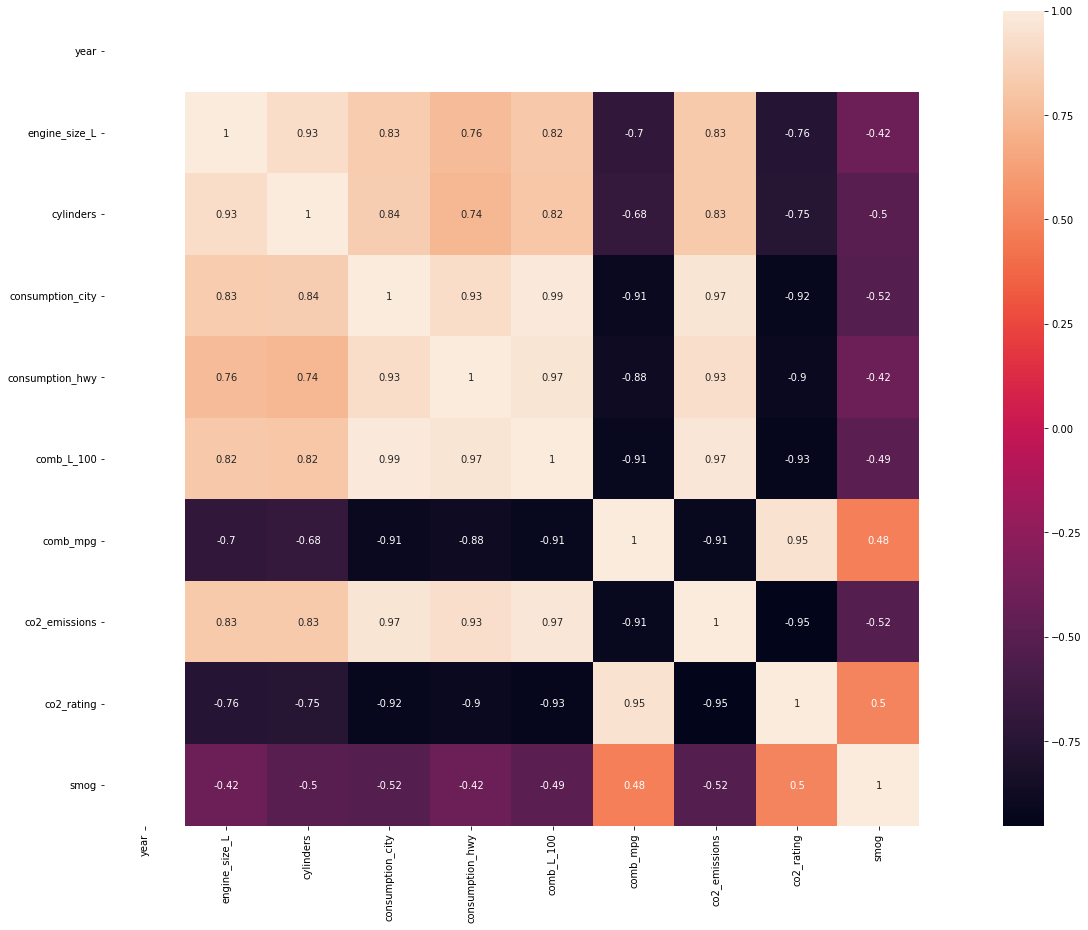

In [127]:
plt.figure(figsize=(30,15))
sns.heatmap(data=fuel_co2.corr(),annot=True, square=True)

#### Testes para a verificação de relação de variáveis com nível de Co2

#### Relação entre o tamanho do motor e a emissão do CO2

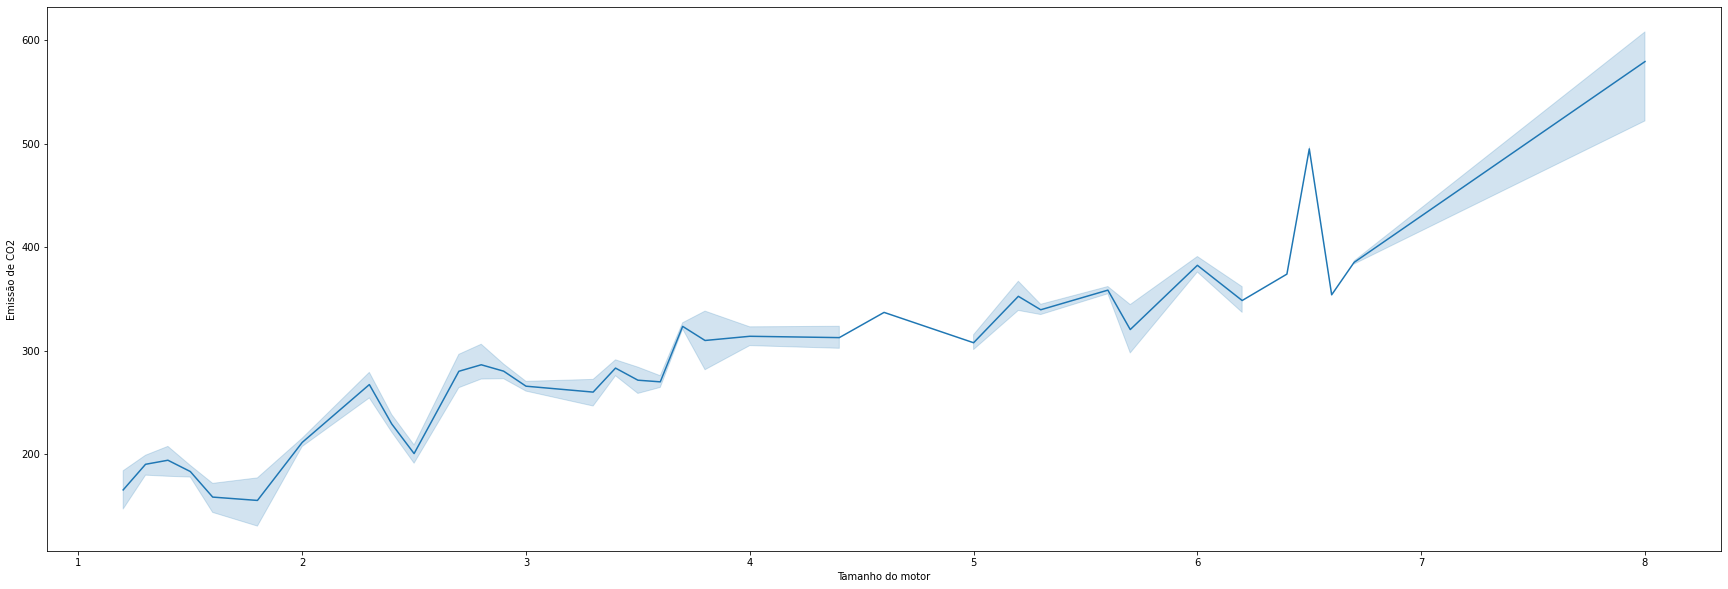

In [128]:
plt.figure(figsize=(30,10))
sns.lineplot(x=fuel_co2['engine_size_L'], y=fuel_co2['co2_emissions'])
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO2')
plt.show()

#### Relação entre o consumo na cidade e a emissão do CO2

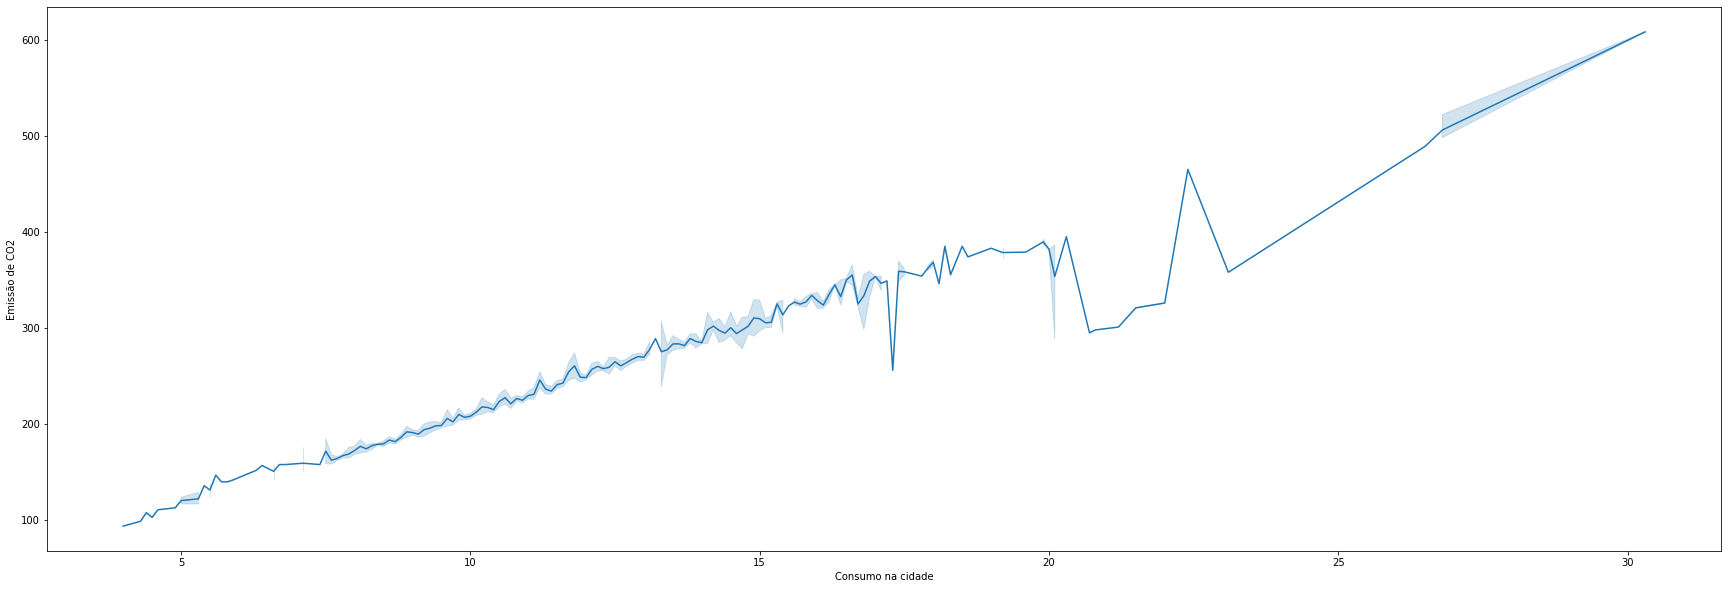

In [129]:
plt.figure(figsize=(30,10))
sns.lineplot(x=fuel_co2['consumption_city'], y=fuel_co2['co2_emissions'])
plt.xlabel('Consumo na cidade')
plt.ylabel('Emissão de CO2')
plt.show()

#### Relação entre o consumo na rodovia e a emissão do CO2

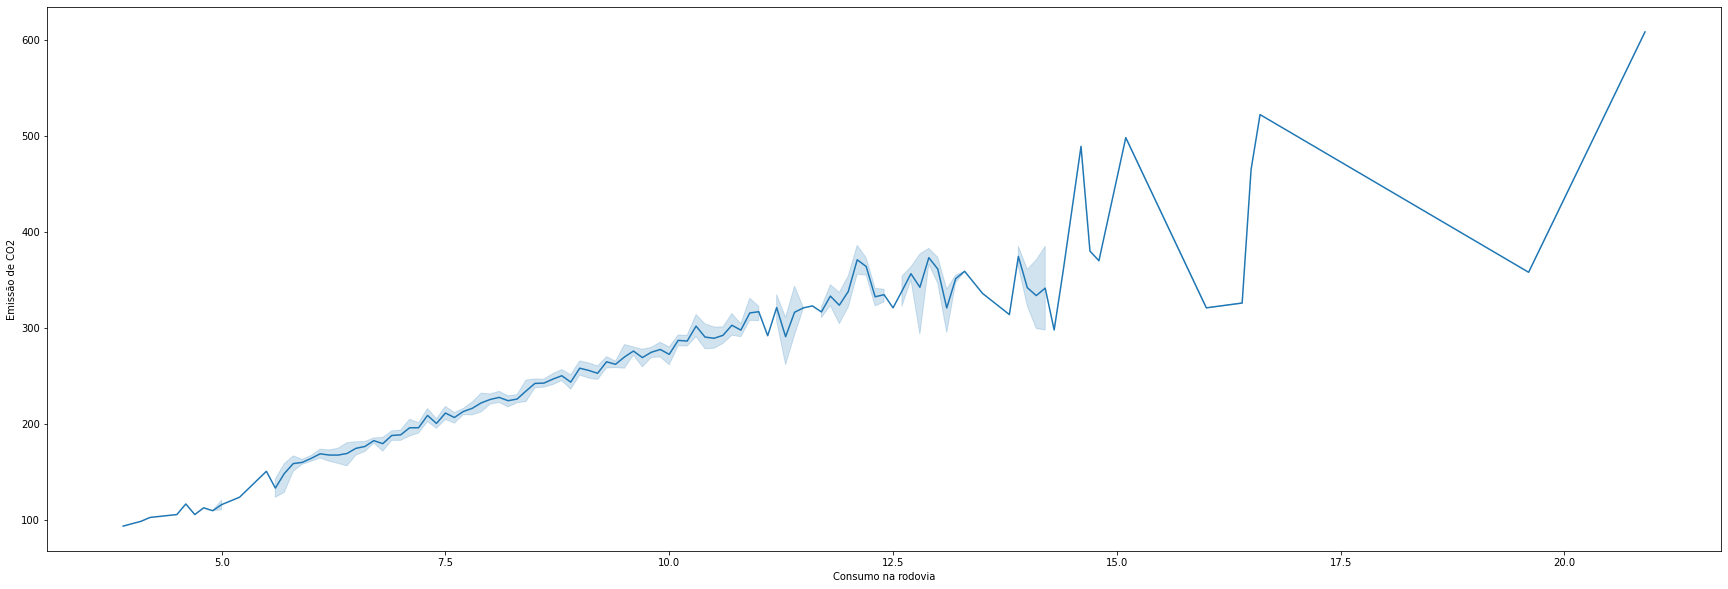

In [130]:
plt.figure(figsize=(30,10))
sns.lineplot(x=fuel_co2['consumption_hwy'], y=fuel_co2['co2_emissions'])
plt.xlabel('Consumo na rodovia')
plt.ylabel('Emissão de CO2')
plt.show()

#### Relação entre o consumo de combustivel (milhas por galão) e a emissão do CO2

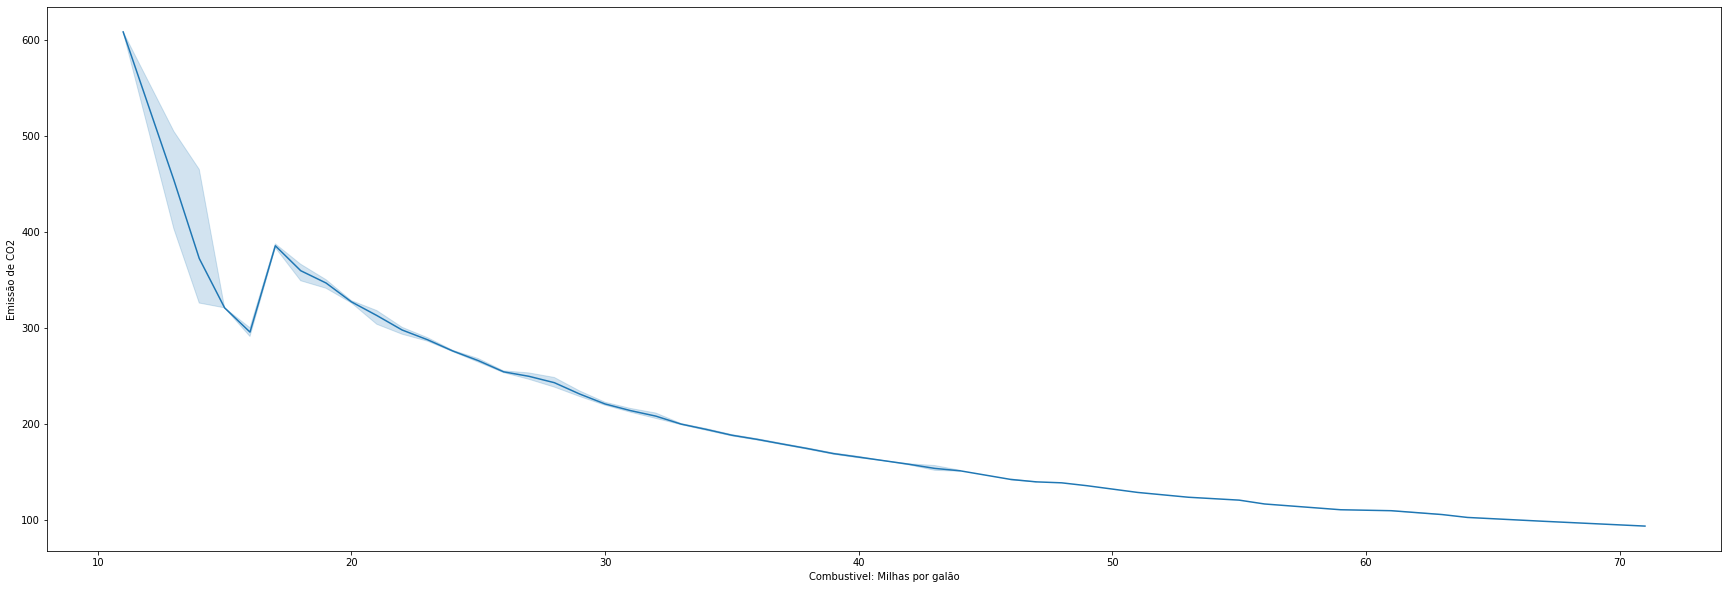

In [131]:
plt.figure(figsize=(30,10))
sns.lineplot(x=fuel_co2['comb_mpg'], y=fuel_co2['co2_emissions'])
plt.xlabel('Combustivel: Milhas por galão')
plt.ylabel('Emissão de CO2')
plt.show()

#### Relação entre o consumo de combustivel (litros a cada 100km) e a emissão do CO2

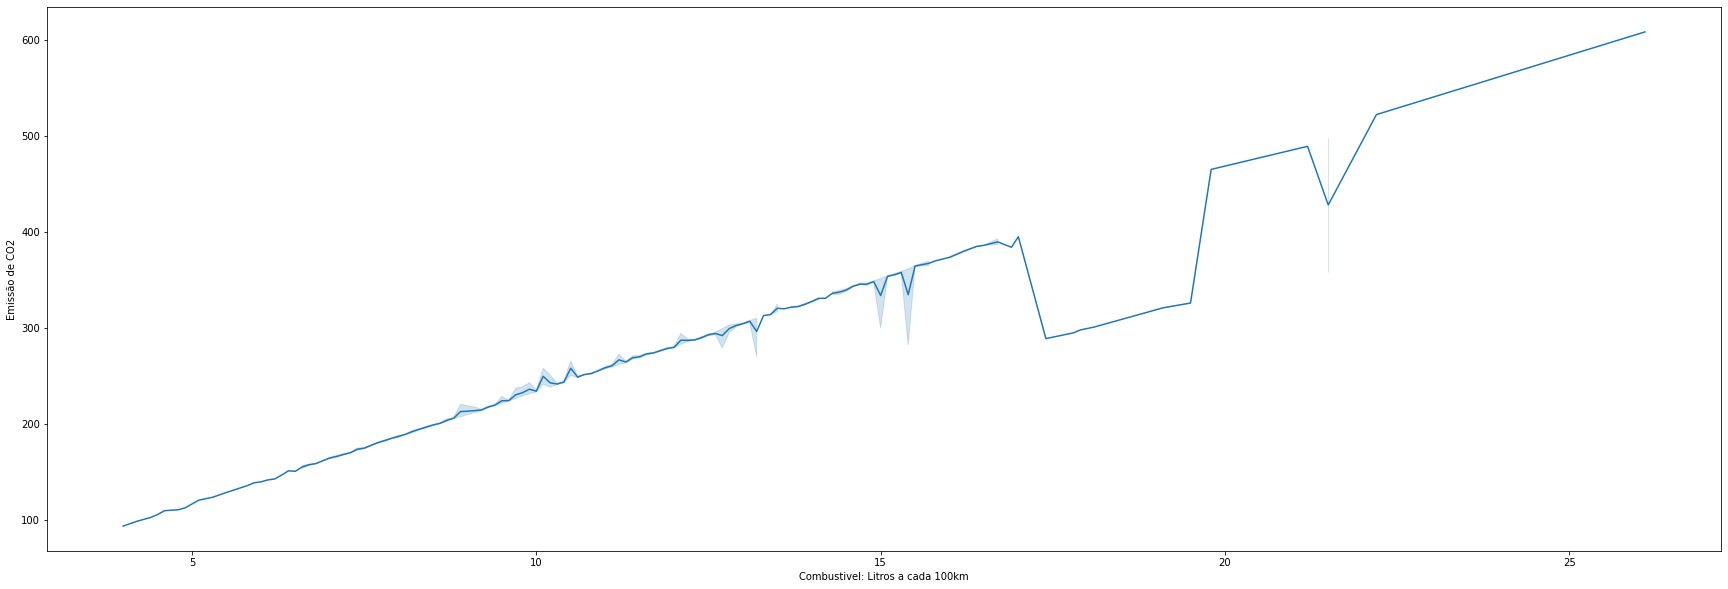

In [132]:
plt.figure(figsize=(30,10))
sns.lineplot(x=fuel_co2['comb_L_100'], y=fuel_co2['co2_emissions'])
plt.xlabel('Combustivel: Litros a cada 100km')
plt.ylabel('Emissão de CO2')
plt.show()

### Ajustes do DataSet

#### Removendo colunas não utilizadas

In [133]:
fuel_co2 = fuel_co2[['co2_emissions', 'engine_size_L', 'consumption_city', 'consumption_hwy','comb_mpg','comb_L_100']]

In [134]:
fuel_co2.head()

,co2_emissions,engine_size_L,consumption_city,consumption_hwy,comb_mpg,comb_L_100
0,200,2.4,9.9,7.0,33,8.6
1,263,3.5,12.6,9.4,25,11.2
2,232,2.0,11.0,8.6,29,9.9
3,242,2.0,11.3,9.1,27,10.3
4,230,2.0,11.2,8.0,29,9.8


#### Dividindo DataSet em treino e teste

In [135]:
fuel_co2_train = fuel_co2.sample(frac=0.8, random_state=25)
fuel_co2_test = fuel_co2.drop(fuel_co2_train.index)

In [136]:
print("Quantidade de dados para treino:", fuel_co2_train.shape)
print("Quantidade de dados para teste:", fuel_co2_test.shape)

Quantidade de dados para treino: (706, 6)
Quantidade de dados para teste: (176, 6)


### Treino

#### Utilizando todos os campos:
* engine_size_L
* consumption_city
* consumption_hwy
* comb_mpg
* comb_L_100





In [137]:
fuel_co2_train_X = fuel_co2_train.iloc[:, 1:6].values
fuel_co2_train_y = fuel_co2_train.iloc[:, 0].values

fuel_co2_test_X = fuel_co2_test.iloc[:, 1:6].values
fuel_co2_test_y = fuel_co2_test.iloc[:, 0].values

In [138]:
regr = linear_model.LinearRegression()

regr.fit(fuel_co2_train_X, fuel_co2_train_y)

fuel_co2_pred_y = regr.predict(fuel_co2_test_X)

In [139]:
print("Mean squared error: %.2f" % mean_squared_error(fuel_co2_test_y, fuel_co2_pred_y))

print("Score: %.2f" % r2_score(fuel_co2_test_y, fuel_co2_pred_y))

Mean squared error: 201.16
Score: 0.95


#### Utilizando todos os campos:
* engine_size_L
* comb_L_100

In [140]:
fuel_co2_train_X = fuel_co2_train.drop(columns=['co2_emissions', 'consumption_city', 'consumption_hwy', 'comb_mpg'])
fuel_co2_train_y = fuel_co2_train.iloc[:, 0].values

fuel_co2_test_X = fuel_co2_test.drop(columns=['co2_emissions', 'consumption_city', 'consumption_hwy', 'comb_mpg'])
fuel_co2_test_y = fuel_co2_test.iloc[:, 0].values

In [141]:
regr = linear_model.LinearRegression()

regr.fit(fuel_co2_train_X, fuel_co2_train_y)

fuel_co2_pred_y = regr.predict(fuel_co2_test_X)

In [142]:
print("Mean squared error: %.2f" % mean_squared_error(fuel_co2_test_y, fuel_co2_pred_y))

print("Score: %.2f" % r2_score(fuel_co2_test_y, fuel_co2_pred_y))

Mean squared error: 215.29
Score: 0.95


#### Utilizando todos os campos:
* consumption_city
* consumption_hwy

In [143]:
fuel_co2_train_X = fuel_co2_train.drop(columns=['co2_emissions', 'engine_size_L', 'comb_mpg', 'comb_L_100'])
fuel_co2_train_y = fuel_co2_train.iloc[:, 0].values

fuel_co2_test_X = fuel_co2_test.drop(columns=['co2_emissions', 'engine_size_L', 'comb_mpg', 'comb_L_100'])
fuel_co2_test_y = fuel_co2_test.iloc[:, 0].values

In [144]:
regr = linear_model.LinearRegression()

regr.fit(fuel_co2_train_X, fuel_co2_train_y)

fuel_co2_pred_y = regr.predict(fuel_co2_test_X)

In [145]:
print("Mean squared error: %.2f" % mean_squared_error(fuel_co2_test_y, fuel_co2_pred_y))

print("Score: %.2f" % r2_score(fuel_co2_test_y, fuel_co2_pred_y))

Mean squared error: 221.40
Score: 0.95
